<a href="https://colab.research.google.com/github/JonathanSum/pytorch-Deep-Learning_colab/blob/master/Ch6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math

In [ ]:
math.tanh(-2.2)         #Garbage truck

-0.9757431300314515

In [ ]:
math.tanh(0.1)          #Bear

0.09966799462495582

In [ ]:
math.tanh(2.5)          #Good doggo

0.9866142981514303

In [ ]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [ ]:
%matplotlib inline
import numpy as np
import torch
import torch.optim as optim

torch.set_printoptions(edgeitems=2, linewidth=75)

t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1) # <1>
t_u = torch.tensor(t_u).unsqueeze(1) # <1>

t_u.shape

torch.Size([11, 1])

In [ ]:
# torch.set_printoptions(edgeitems=2, linewidth=75)

# t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
# t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
# t_c = torch.tensor(t_c).unsqueeze(1) # <1>
# t_u = torch.tensor(t_u).unsqueeze(1) # <1>

# t_u.shape

# n_samples = t_u.shape[0]
# torch.randperm(n_samples)

# n_val = int(0.2 * n_samples)

# shuffled_indices = torch.randperm(n_samples)

# train_indices = shuffled_indices[:-n_val]
# val_indices = shuffled_indices[-n_val:]

# train_indices, val_indices

# t_u_train = t_u[train_indices]
# t_c_train = t_c[train_indices]

# t_u_val = t_u[val_indices]
# t_c_val = t_c[val_indices]

# t_un_train = 0.1 * t_u_train
# t_un_val = 0.1 * t_u_val

In [ ]:
torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]).shape, torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]).unsqueeze(1).shape

(torch.Size([11]), torch.Size([11, 1]))

In [ ]:
n_samples = t_u.shape[0]
torch.randperm(n_samples)

tensor([ 4,  0,  8,  3,  2,  6,  9,  5,  1,  7, 10])

In [ ]:
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([ 3,  7,  4,  8,  1,  9,  2,  0, 10]), tensor([6, 5]))

In [ ]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

In [ ]:
import torch.nn as nn
linear_model = nn.Linear(1, 1)
linear_model(t_un_val)

tensor([[1.4059],
        [1.7409]], grad_fn=<AddmmBackward>)

In [ ]:
# y = model(x)
# y = model.forward(x) Silent error. Don’t do it!

In [ ]:
linear_model.weight

Parameter containing:
tensor([[0.2233]], requires_grad=True)

In [ ]:
linear_model.bias

Parameter containing:
tensor([0.6488], requires_grad=True)

In [ ]:
x = torch.ones(1)
linear_model(x)

tensor([0.8721], grad_fn=<AddBackward0>)

In [ ]:
x = torch.ones(10,1)
linear_model(x)

tensor([[0.8721],
        [0.8721],
        [0.8721],
        [0.8721],
        [0.8721],
        [0.8721],
        [0.8721],
        [0.8721],
        [0.8721],
        [0.8721]], grad_fn=<AddmmBackward>)

In [ ]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1)
t_u = torch.tensor(t_u).unsqueeze(1)

In [ ]:
next(linear_model.parameters()), next(linear_model.parameters())

(Parameter containing:
 tensor([[0.2233]], requires_grad=True), Parameter containing:
 tensor([[0.2233]], requires_grad=True))

In [ ]:
linear_model.bias

Parameter containing:
tensor([0.6488], requires_grad=True)

In [ ]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[0.2233]], requires_grad=True), Parameter containing:
 tensor([0.6488], requires_grad=True)]

In [ ]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(
    linear_model.parameters(),
    lr=1e-2)

In [ ]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[-0.0778]], requires_grad=True), Parameter containing:
 tensor([-0.7706], requires_grad=True)]

In [ ]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,
                  t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train)
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val)

        loss_val = loss_fn(t_p_val, t_c_val)

        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()

        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")


In [ ]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(n_epochs = 3000,
              optimizer = optimizer,
              model = linear_model,
              loss_fn = loss_fn,
              t_u_train = t_un_train,
              t_u_val = t_un_val,
              t_c_train = t_c_train,
              t_c_val = t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 168.9870, Validation loss 23.5689
Epoch 1000, Training loss 3.8770, Validation loss 1.4781
Epoch 2000, Training loss 2.9397, Validation loss 2.9425
Epoch 3000, Training loss 2.9058, Validation loss 3.3994

Parameter containing:
tensor([[5.5005]], requires_grad=True)
Parameter containing:
tensor([-18.1425], requires_grad=True)


In [ ]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 3000,
    optimizer = optimizer,
    model = linear_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 399.9998, Validation loss 106.2928
Epoch 1000, Training loss 3.8893, Validation loss 1.4729
Epoch 2000, Training loss 2.9402, Validation loss 2.9392
Epoch 3000, Training loss 2.9058, Validation loss 3.3987

Parameter containing:
tensor([[5.5004]], requires_grad=True)
Parameter containing:
tensor([-18.1417], requires_grad=True)


In [ ]:
seq_model = nn.Sequential(
            nn.Linear(1, 13),
            nn.Tanh(),
            nn.Linear(13, 1))
seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [ ]:
# list(seq_model.parameters())

In [ ]:
[param.shape for param in seq_model.parameters()]

[torch.Size([13, 1]), torch.Size([13]), torch.Size([1, 13]), torch.Size([1])]

In [ ]:
c

In [ ]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


In [ ]:
from collections import OrderedDict
seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 8)),                                       
    ('hidden_activation', nn.Tanh()),                                     
    ('output_linear', nn.Linear(8, 1)),
]))
seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [ ]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

hidden_linear.weight torch.Size([8, 1])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])


In [ ]:
seq_model.output_linear.bias

Parameter containing:
tensor([-0.3074], requires_grad=True)

In [ ]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)

In [ ]:
training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val)

Epoch 1, Training loss 223.0596, Validation loss 37.5341
Epoch 1000, Training loss 11.2784, Validation loss 6.0686
Epoch 2000, Training loss 3.8700, Validation loss 4.0800
Epoch 3000, Training loss 2.0012, Validation loss 4.6095
Epoch 4000, Training loss 1.5637, Validation loss 5.2539
Epoch 5000, Training loss 1.5055, Validation loss 5.5601


In [ ]:
#overfit
training_loop(
    n_epochs = 500000000,
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val)

Epoch 920000, Training loss 0.9368, Validation loss 4.5551
Epoch 921000, Training loss 0.9368, Validation loss 4.5555
Epoch 922000, Training loss 0.9367, Validation loss 4.5558
Epoch 923000, Training loss 0.9367, Validation loss 4.5562
Epoch 924000, Training loss 0.9367, Validation loss 4.5566
Epoch 925000, Training loss 0.9367, Validation loss 4.5570
Epoch 926000, Training loss 0.9366, Validation loss 4.5573
Epoch 927000, Training loss 0.9366, Validation loss 4.5577
Epoch 928000, Training loss 0.9366, Validation loss 4.5581
Epoch 929000, Training loss 0.9366, Validation loss 4.5585
Epoch 930000, Training loss 0.9366, Validation loss 4.5589
Epoch 931000, Training loss 0.9365, Validation loss 4.5593
Epoch 932000, Training loss 0.9365, Validation loss 4.5597
Epoch 933000, Training loss 0.9365, Validation loss 4.5601


KeyboardInterrupt: ignored

In [ ]:
print('output', seq_model(t_un_val))
print('answer', t_c_val)
print('hidden', seq_model.hidden_linear.weight.grad)

output tensor([[0.2950],
        [6.6571]], grad_fn=<AddmmBackward>)
answer tensor([[3.],
        [8.]])
hidden tensor([[ 2.0177e-04],
        [-6.3034e-04],
        [-1.7371e-04],
        [-3.0083e-04],
        [-8.2391e-05],
        [ 5.1665e-06],
        [ 4.0932e-05],
        [ 3.5724e-05]])


In [ ]:
t_un_val

tensor([[3.3900],
        [4.8900]])

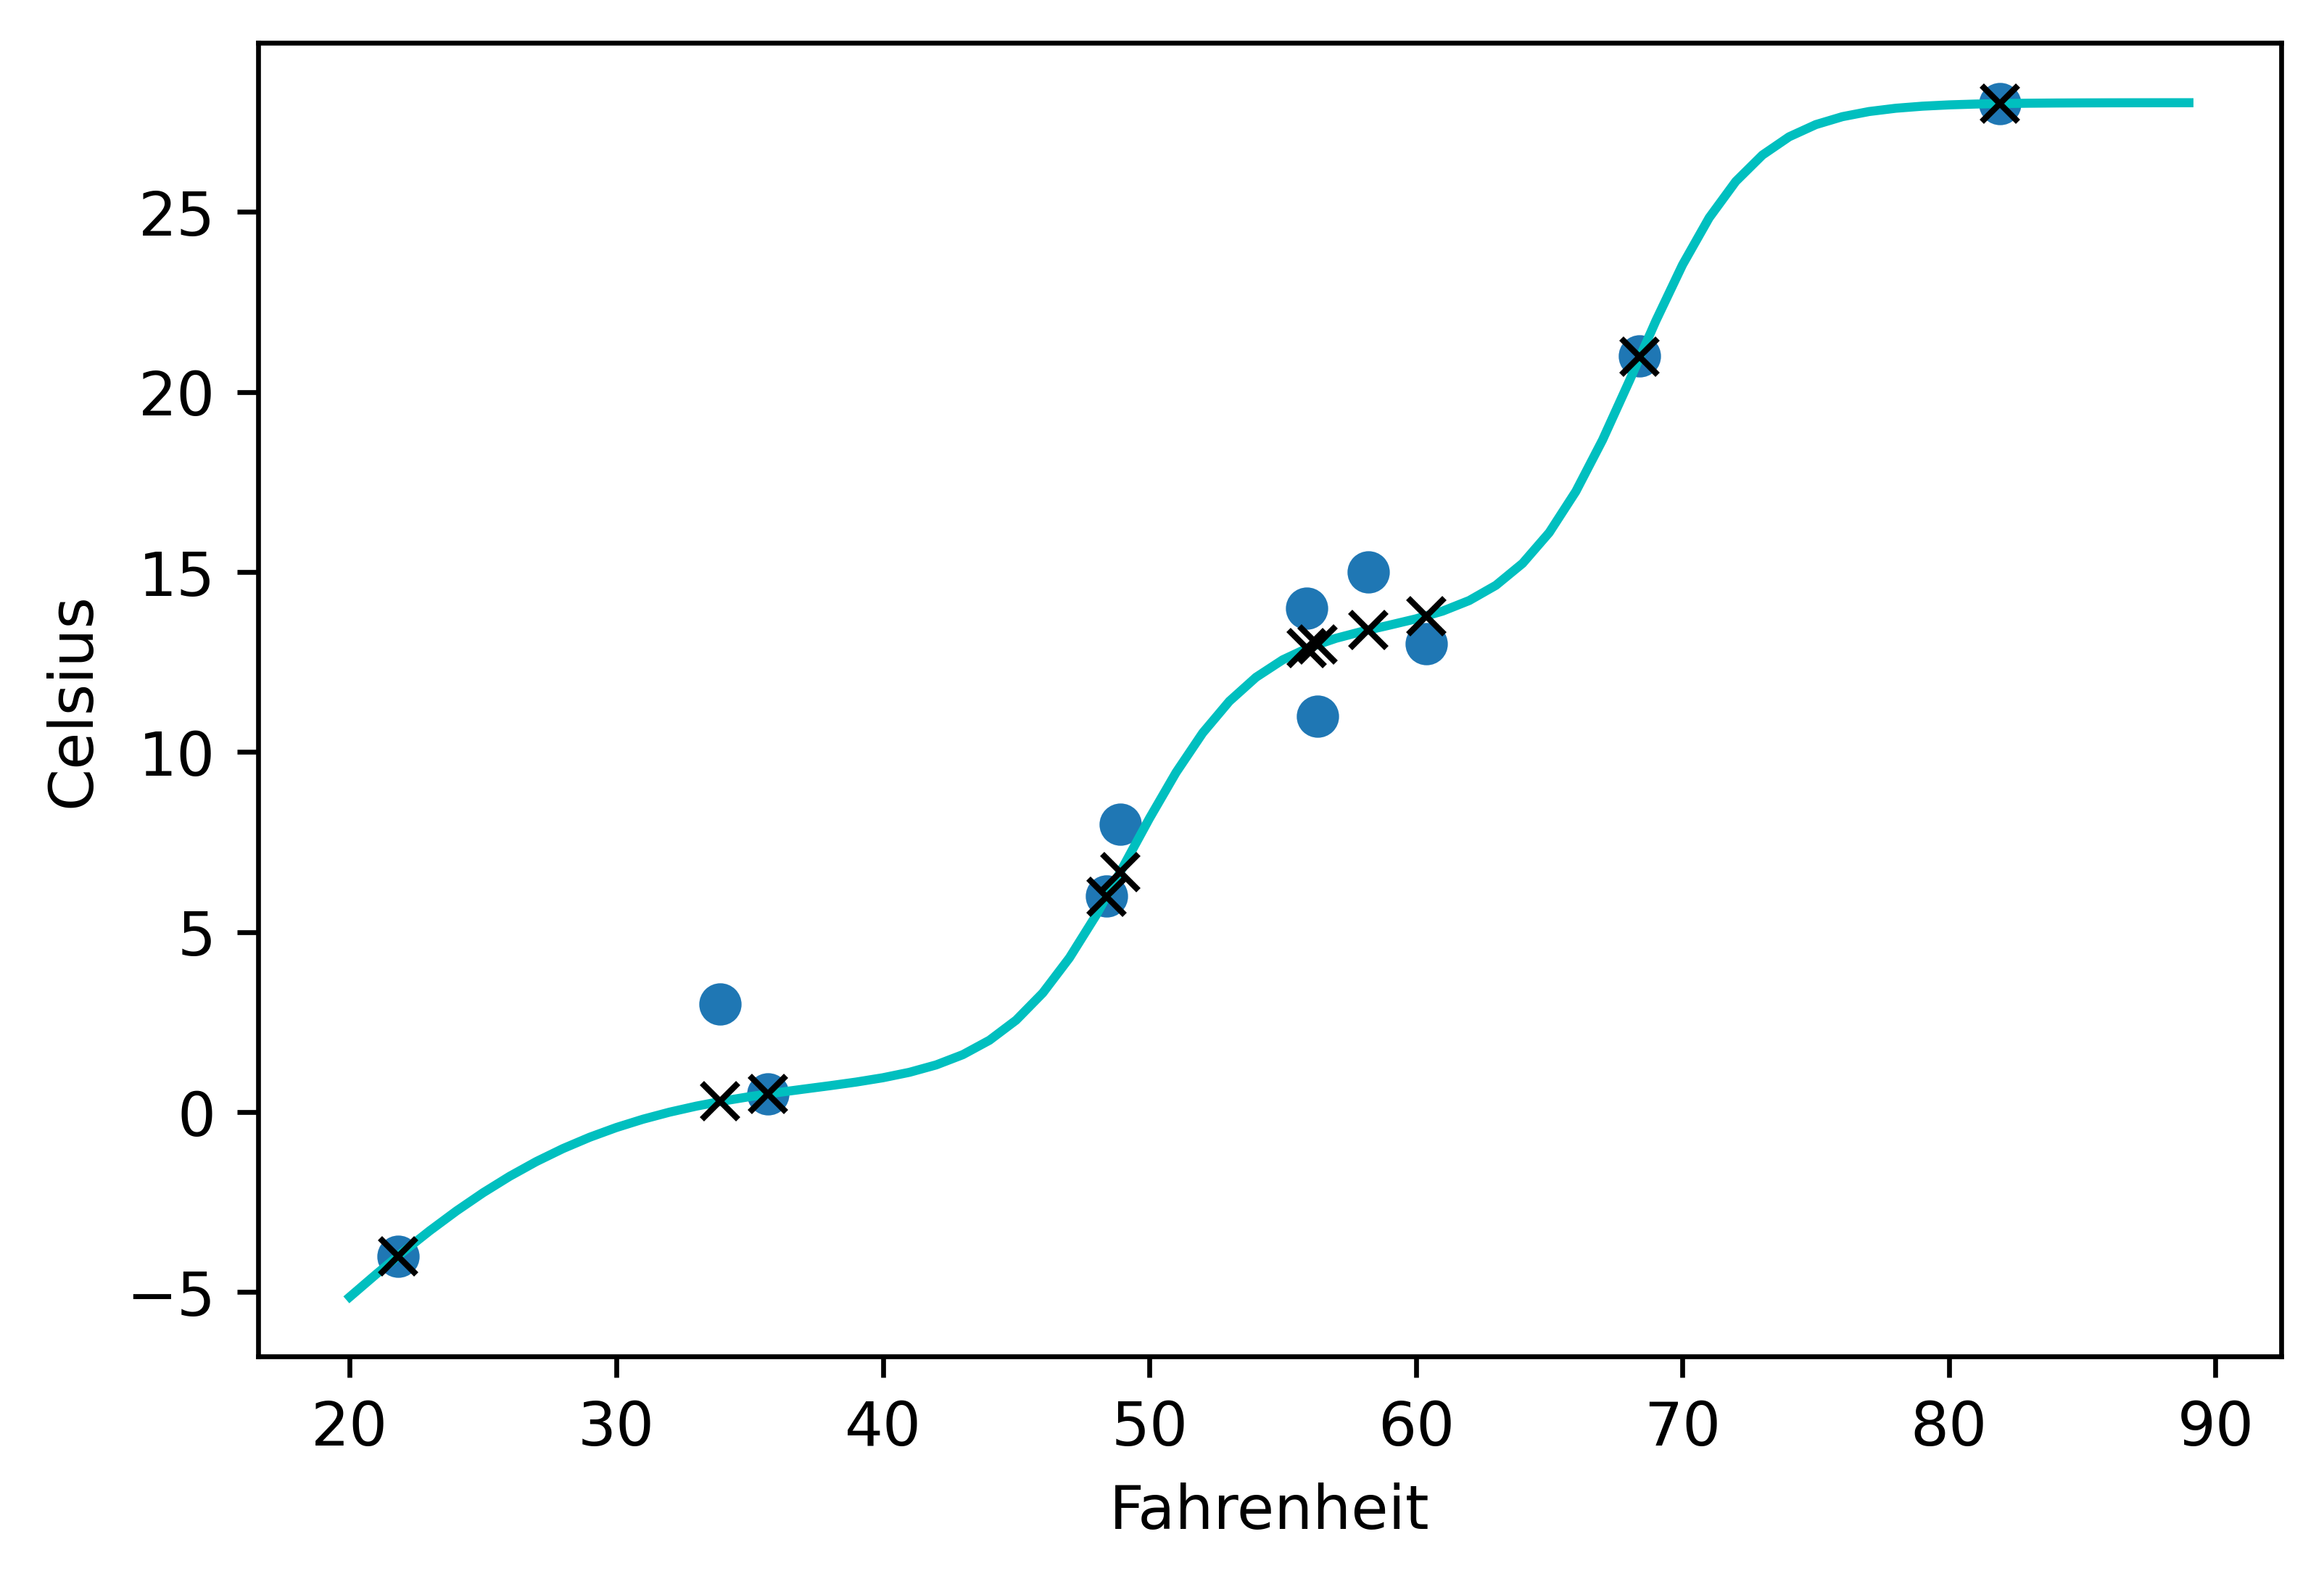

In [ ]:
#overfit
from matplotlib import pyplot as plt
t_range = torch.arange(20., 90.).unsqueeze(1)
fig = plt.figure(dpi=600)

plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')

Exercises<br>
1 Experiment with the number of hidden neurons in our<br> simple neural network<br>
model, as well as the learning rate.<br><br>
a What changes result in more linear output from the model?<br><br>
That is removing the tanh or increasing the number of neurons.<br><br>
b Can you get the model to obviously overfit the data?<br><br>
Yes, that is increasing the number of epoches.<br>

In [ ]:
from collections import OrderedDict
seq_model = nn.Sequential(OrderedDict([
    ('h1', nn.Linear(1, 8)),                                       
    ('a1', nn.Tanh()),                                     
    ('h2', nn.Linear(8, 4)),
    ('a2', nn.Tanh()),  
    ('h3', nn.Linear(4, 2)),
    ('a3', nn.Tanh()),  
    ('h4', nn.Linear(2, 1)),
]))


optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)
seq_model

Sequential(
  (h1): Linear(in_features=1, out_features=8, bias=True)
  (a1): Tanh()
  (h2): Linear(in_features=8, out_features=4, bias=True)
  (a2): Tanh()
  (h3): Linear(in_features=4, out_features=2, bias=True)
  (a3): Tanh()
  (h4): Linear(in_features=2, out_features=1, bias=True)
)

In [ ]:
training_loop(
    n_epochs = 10000,
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val)

Epoch 1, Training loss 10.4615, Validation loss 10.6402
Epoch 1000, Training loss 3.1474, Validation loss 3.9670
Epoch 2000, Training loss 3.2605, Validation loss 3.8205
Epoch 3000, Training loss 3.0763, Validation loss 3.6081
Epoch 4000, Training loss 2.4557, Validation loss 3.8080
Epoch 5000, Training loss 2.3846, Validation loss 3.7694
Epoch 6000, Training loss 2.3225, Validation loss 3.7526
Epoch 7000, Training loss 2.2650, Validation loss 3.7477
Epoch 8000, Training loss 2.2106, Validation loss 3.7516
Epoch 9000, Training loss 2.1584, Validation loss 3.7628
Epoch 10000, Training loss 2.1077, Validation loss 3.7809


In [ ]:
training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val)

Epoch 1, Training loss 228.2977, Validation loss 39.0296
Epoch 1000, Training loss 12.5312, Validation loss 7.8788
Epoch 2000, Training loss 5.9922, Validation loss 5.0756
Epoch 3000, Training loss 3.0057, Validation loss 4.8386
Epoch 4000, Training loss 1.8865, Validation loss 5.2645
Epoch 5000, Training loss 1.5344, Validation loss 5.8603


In [ ]:
print('output', seq_model(t_un_val))
print('answer', t_c_val)
print('h1', seq_model.h1.weight.grad)

output tensor([[-0.1954],
        [ 5.6079]], grad_fn=<AddmmBackward>)
answer tensor([[3.],
        [8.]])
h1 tensor([[ 1.0034e-01],
        [ 1.9108e-02],
        [ 1.4429e-01],
        [ 3.1840e-01],
        [-9.3425e+00],
        [-4.4606e-02],
        [-4.4387e+01],
        [ 1.2018e+01]])


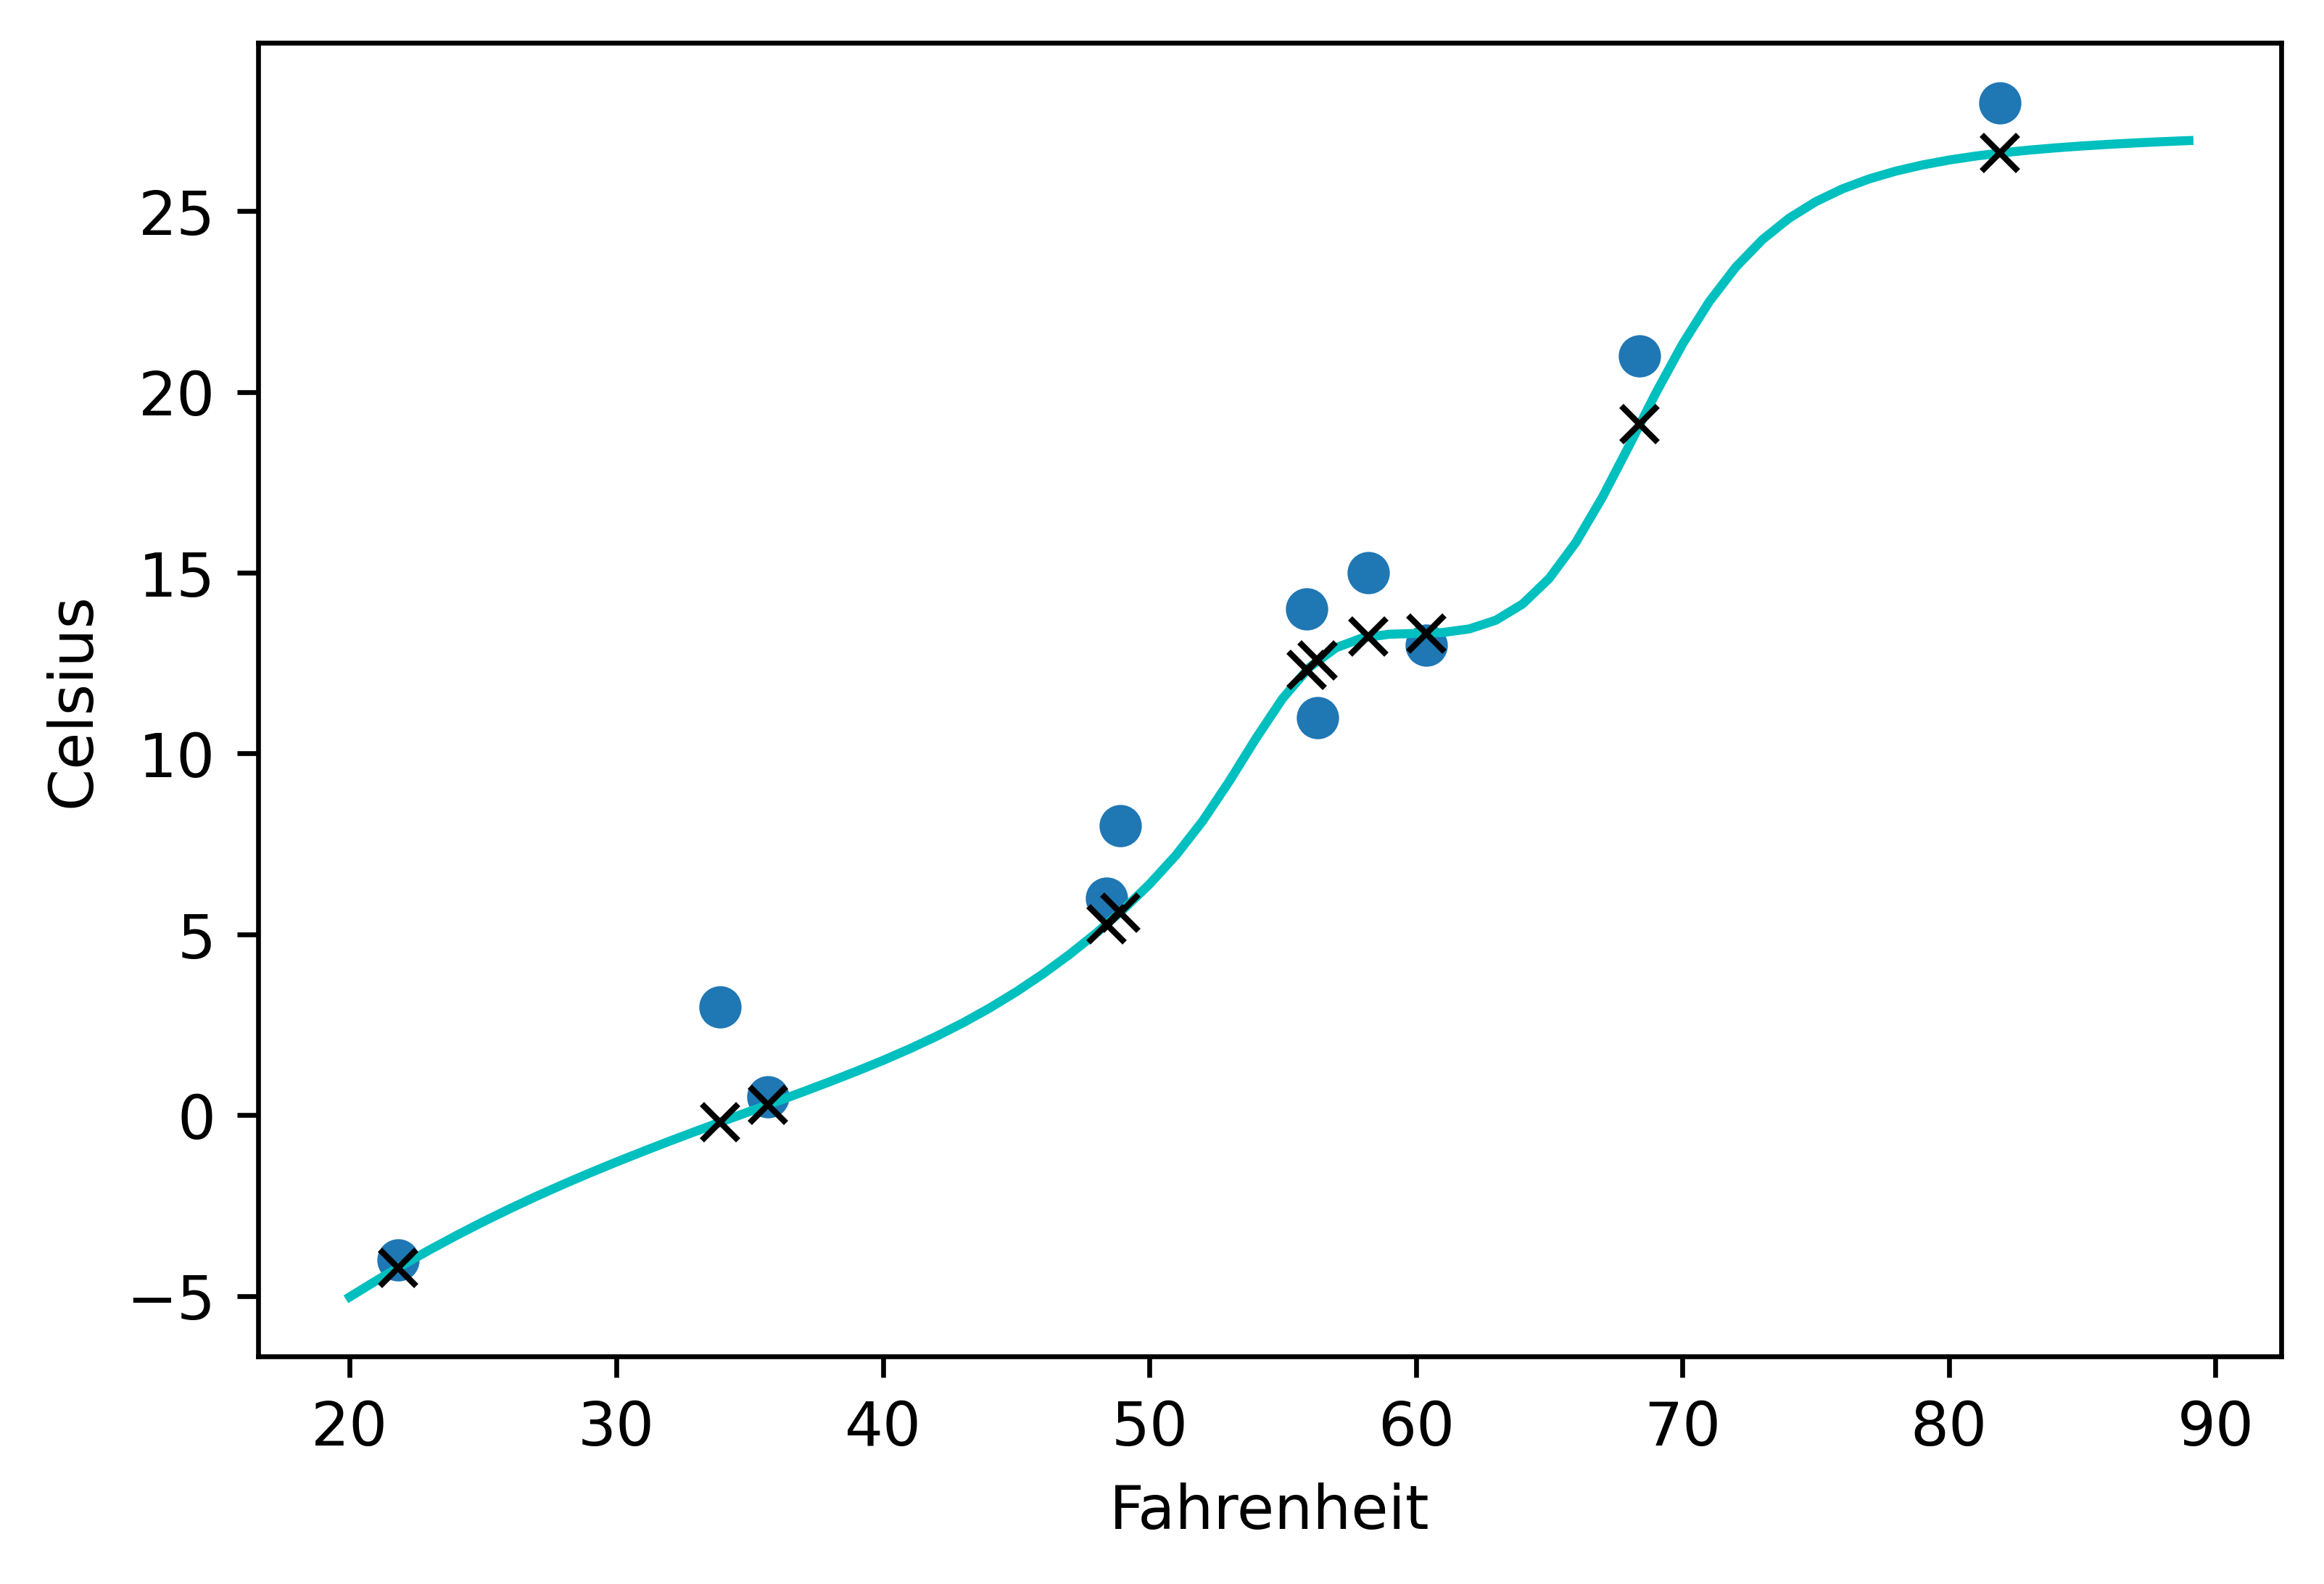

In [ ]:
#increasing the number of neuro to be 512.
from matplotlib import pyplot as plt
t_range = torch.arange(20., 90.).unsqueeze(1)
fig = plt.figure(dpi=600)

plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')

In [ ]:
from collections import OrderedDict
seq_model = nn.Sequential(OrderedDict([
    ('h1', nn.Linear(1, 8)),                                       
    ('a1', nn.Tanh()),                                     
    ('h2', nn.Linear(8, 1)),
]))


optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)
seq_model

Sequential(
  (h1): Linear(in_features=1, out_features=8, bias=True)
  (a1): Tanh()
  (h2): Linear(in_features=8, out_features=1, bias=True)
)

In [ ]:
training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val)

Epoch 1, Training loss 205.6729, Validation loss 29.6111
Epoch 1000, Training loss 10.9160, Validation loss 6.5788
Epoch 2000, Training loss 4.8455, Validation loss 4.2595
Epoch 3000, Training loss 2.5547, Validation loss 4.2935
Epoch 4000, Training loss 1.7845, Validation loss 4.8399
Epoch 5000, Training loss 1.5668, Validation loss 5.3032


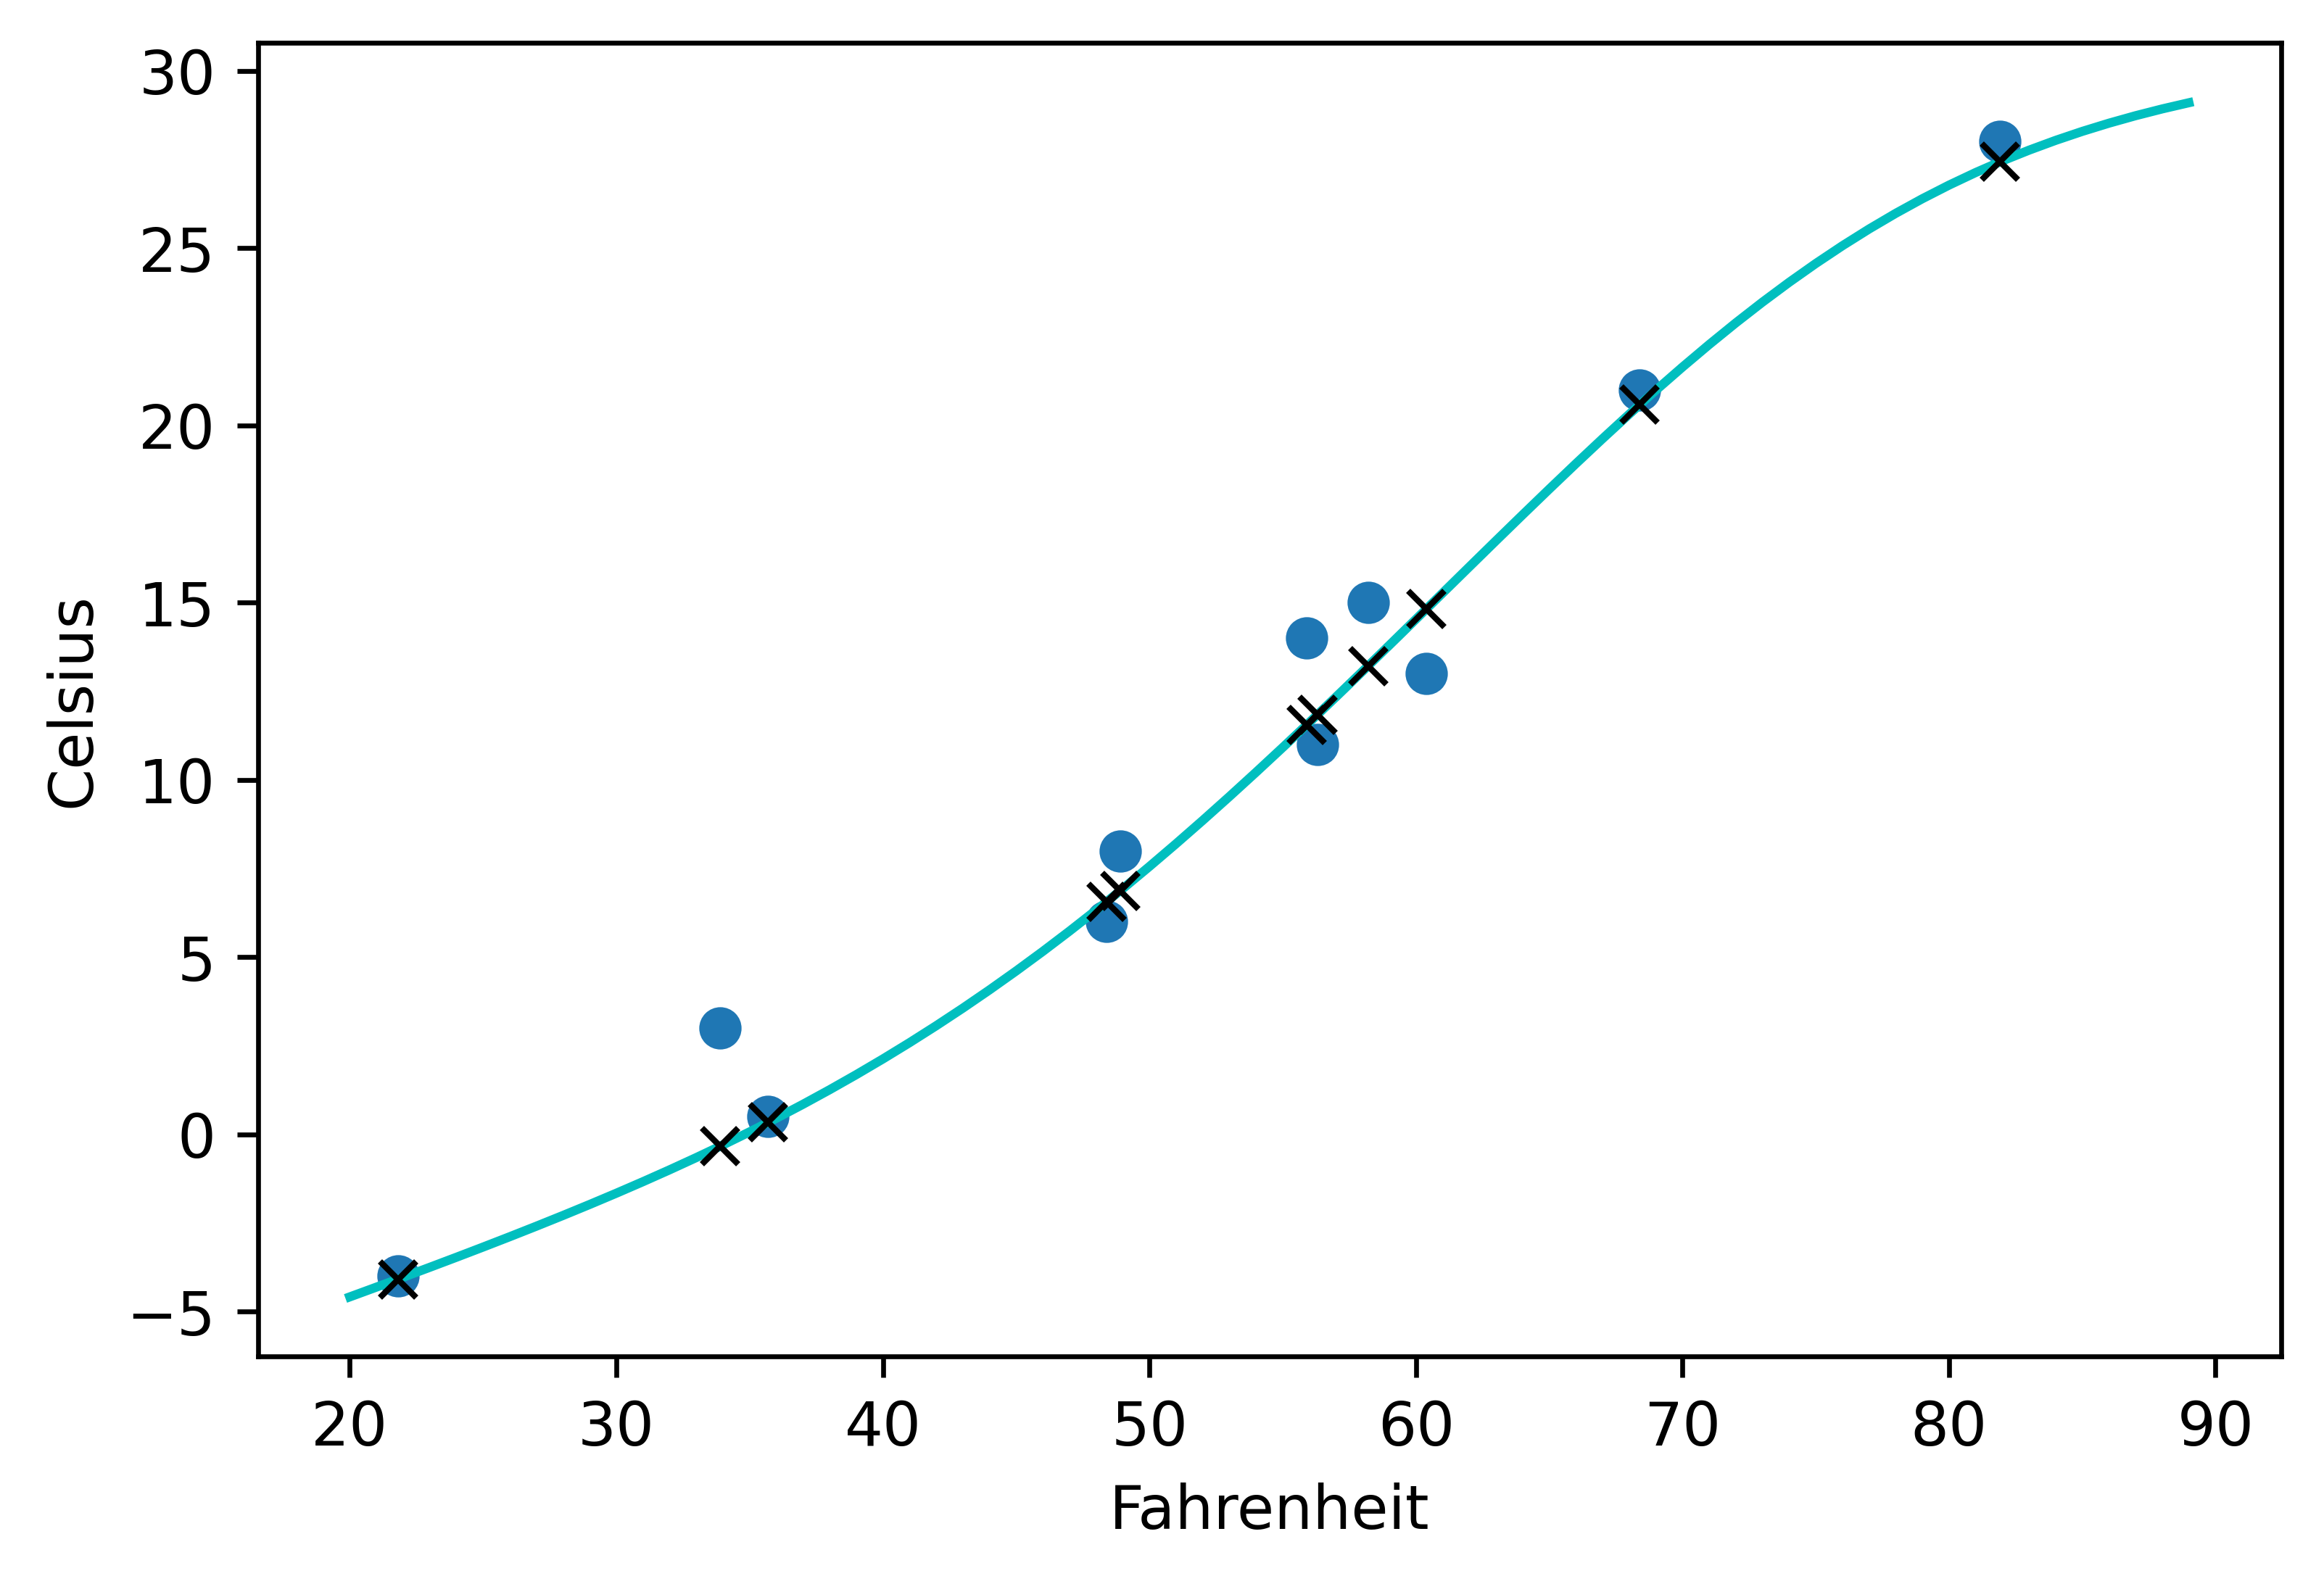

In [ ]:
from matplotlib import pyplot as plt
t_range = torch.arange(20., 90.).unsqueeze(1)
fig = plt.figure(dpi=600)

plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')

2 The third-hardest problem in physics is finding a proper wine to celebrate discoveries. Load the wine data from chapter 4, and create a new model with the appropriate number of input parameters.<br><br>
a How long does it take to train compared to the temperature data we have
been using?<br>

Very long since we do not use a batch.<br>
b Can you explain what factors contribute to the training times?<br>

If we can use a batch size, it will be faster.<br>
c Can you get the loss to decrease while training on this dataset?<br>
Yes<br>
d How would you go about graphing this dataset?<br>
Compair their output value<br>

In [ ]:
!git clone https://github.com/deep-learning-with-pytorch/dlwpt-code.git

Cloning into 'dlwpt-code'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 703 (delta 7), reused 2 (delta 1), pack-reused 686
Receiving objects: 100% (703/703), 185.80 MiB | 25.47 MiB/s, done.
Resolving deltas: 100% (303/303), done.
Checking out files: 100% (228/228), done.


In [ ]:
import csv
import numpy as np
wine_path = "/content/dlwpt-code/data/p1ch4/tabular-wine/winequality-white.csv"
wineq_numpy = np.loadtxt(wine_path, dtype=np.float32, delimiter=";", skiprows=1)

wineq_numpy

array([[ 7.  ,  0.27,  0.36, ...,  0.45,  8.8 ,  6.  ],
       [ 6.3 ,  0.3 ,  0.34, ...,  0.49,  9.5 ,  6.  ],
       [ 8.1 ,  0.28,  0.4 , ...,  0.44, 10.1 ,  6.  ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  0.46,  9.4 ,  6.  ],
       [ 5.5 ,  0.29,  0.3 , ...,  0.38, 12.8 ,  7.  ],
       [ 6.  ,  0.21,  0.38, ...,  0.32, 11.8 ,  6.  ]], dtype=float32)

In [ ]:
col_list = next(csv.reader(open(wine_path), delimiter=';'))
wineq_numpy.shape, col_list

((4898, 12),
 ['fixed acidity',
  'volatile acidity',
  'citric acid',
  'residual sugar',
  'chlorides',
  'free sulfur dioxide',
  'total sulfur dioxide',
  'density',
  'pH',
  'sulphates',
  'alcohol',
  'quality'])

In [ ]:
wineq = torch.from_numpy(wineq_numpy)
wineq.shape, wineq.dtype

(torch.Size([4898, 12]), torch.float32)

In [ ]:
data = wineq[:,:-1]
target = wineq[:,-1]
print(data.shape)
print(target.shape)

torch.Size([4898, 11])
torch.Size([4898])


In [ ]:
target = wineq[:, -1].float()
target

tensor([6., 6., 6., 6.,  ..., 5., 6., 7., 6.])

In [ ]:
target.shape

torch.Size([4898])

In [ ]:
target_onehot = torch.zeros(target.shape[0], 10)
target_onehot.scatter_(1, target.unsqueeze(1), 1.0)

tensor([[0., 0.,  ..., 0., 0.],
        [0., 0.,  ..., 0., 0.],
        ...,
        [0., 0.,  ..., 0., 0.],
        [0., 0.,  ..., 0., 0.]])

In [ ]:
target[-1]

tensor(6)

In [ ]:
target_onehot.scatter_(1, target.unsqueeze(1), 1.0).shape

torch.Size([4898, 10])

In [ ]:
target_unsqueezed = target.unsqueeze(1)
target_unsqueezed.shape

torch.Size([4898, 1])

In [ ]:
target_unsqueezed

tensor([[6],
        [6],
        ...,
        [7],
        [6]])

In [ ]:
print(data.shape)
data

torch.Size([4898, 11])


tensor([[ 7.0000,  0.2700,  ...,  0.4500,  8.8000],
        [ 6.3000,  0.3000,  ...,  0.4900,  9.5000],
        ...,
        [ 5.5000,  0.2900,  ...,  0.3800, 12.8000],
        [ 6.0000,  0.2100,  ...,  0.3200, 11.8000]])

In [ ]:
data_mean = torch.mean(data, dim=0)
print(data_mean.shape)
data_mean

torch.Size([11])


tensor([6.8548e+00, 2.7824e-01, 3.3419e-01, 6.3914e+00, 4.5772e-02,
        3.5308e+01, 1.3836e+02, 9.9403e-01, 3.1883e+00, 4.8985e-01,
        1.0514e+01])

In [ ]:
data_var = torch.var(data, dim=0)
data_var

tensor([7.1211e-01, 1.0160e-02, 1.4646e-02, 2.5726e+01, 4.7733e-04,
        2.8924e+02, 1.8061e+03, 8.9455e-06, 2.2801e-02, 1.3025e-02,
        1.5144e+00])

In [ ]:
data_normalized = (data - data_mean) / torch.sqrt(data_var)
data_normalized

tensor([[ 1.7208e-01, -8.1761e-02,  ..., -3.4915e-01, -1.3930e+00],
        [-6.5743e-01,  2.1587e-01,  ...,  1.3422e-03, -8.2419e-01],
        ...,
        [-1.6054e+00,  1.1666e-01,  ..., -9.6251e-01,  1.8574e+00],
        [-1.0129e+00, -6.7703e-01,  ..., -1.4882e+00,  1.0448e+00]])

In [ ]:
data_normalized.shape

torch.Size([4898, 11])

In [ ]:
target.shape

torch.Size([4898])

In [ ]:
from collections import OrderedDict
seq_model_wine = nn.Sequential(OrderedDict([
    ('h1', nn.Linear(11, 32)),                                       
    ('a1', nn.Tanh()),  
    ('h2', nn.Linear(32, 16)),                                       
    ('a2', nn.Tanh()),  
    ('h3', nn.Linear(16, 8)),                                       
    ('a3', nn.Tanh()),                                         
    ('h4', nn.Linear(8, 1)),
]))


optimizer = optim.SGD(seq_model_wine.parameters(), lr=1e-3)
seq_model_wine

Sequential(
  (h1): Linear(in_features=11, out_features=32, bias=True)
  (a1): Tanh()
  (h2): Linear(in_features=32, out_features=16, bias=True)
  (a2): Tanh()
  (h3): Linear(in_features=16, out_features=8, bias=True)
  (a3): Tanh()
  (h4): Linear(in_features=8, out_features=1, bias=True)
)

In [ ]:
t_c.shape, t_u.shape

(torch.Size([11, 1]), torch.Size([11, 1]))

In [ ]:
torch.set_printoptions(edgeitems=4, linewidth=75)

wine_in = data_normalized
wine_out = target

print(wine_in.shape)

n_samples = wine_in.shape[0]
torch.randperm(n_samples)

n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

torch.Size([4898, 11])


In [ ]:
train_indices.shape

torch.Size([3919])

In [ ]:
val_indices.shape

torch.Size([979])

In [ ]:
train_indices, val_indices

t_u_train = wine_in[train_indices]
t_c_train = wine_out[train_indices]

t_u_val = wine_in[val_indices]
t_c_val = wine_out[val_indices]

t_un_train = t_u_train
t_un_val = t_u_val

In [ ]:
t_un_train.shape, t_c_train.shape

(torch.Size([3919, 11]), torch.Size([3919]))

In [ ]:
print(t_u_train); t_u_val

tensor([[81.9000],
        [21.8000],
        [56.3000],
        [48.4000],
        [55.9000],
        [60.4000],
        [58.2000],
        [35.7000],
        [68.4000]])


tensor([[33.9000],
        [48.9000]])

In [ ]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,
                  t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train)
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val)

        loss_val = loss_fn(t_p_val, t_c_val)

        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()

        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")


In [ ]:
t_un_train[0].shape

torch.Size([11])

In [ ]:
t_c_train.shape, 

torch.Size([3919])

In [ ]:
seq_model_wine(t_u_train).shape

torch.Size([3919, 1])

In [ ]:
t_c_train.shape

torch.Size([3919])

In [ ]:
t_un_train.t().shape

torch.Size([11, 979])

In [ ]:
training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    model = seq_model_wine,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val)




/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([3919])) that is different to the input size (torch.Size([3919, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([979])) that is different to the input size (torch.Size([979, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1, Training loss 33.5530, Validation loss 33.8342
Epoch 1000, Training loss 0.7839, Validation loss 0.8416
Epoch 2000, Training loss 0.7790, Validation loss 0.8367
Epoch 3000, Training loss 0.7773, Validation loss 0.8349
Epoch 4000, Training loss 0.7764, Validation loss 0.8341
Epoch 5000, Training loss 0.7759, Validation loss 0.8336


In [ ]:
t_c

tensor([[ 0.5000],
        [14.0000],
        [15.0000],
        [28.0000],
        [11.0000],
        [ 8.0000],
        [ 3.0000],
        [-4.0000],
        [ 6.0000],
        [13.0000],
        [21.0000]])

In [ ]:
out_wine_data = seq_model_wine(t_un_train)

In [ ]:
out_wine_data.shape

torch.Size([3919, 1])

In [ ]:
num_out = float(out_wine_data.shape[0])

In [ ]:
float(num_out)

3919.0

In [ ]:
t_c.numpy().shape

torch.Size([3919])

In [ ]:
t_range.numpy().shape

(3918, 1)

In [ ]:
out_wine_data.detach().numpy().shape

(3919, 1)

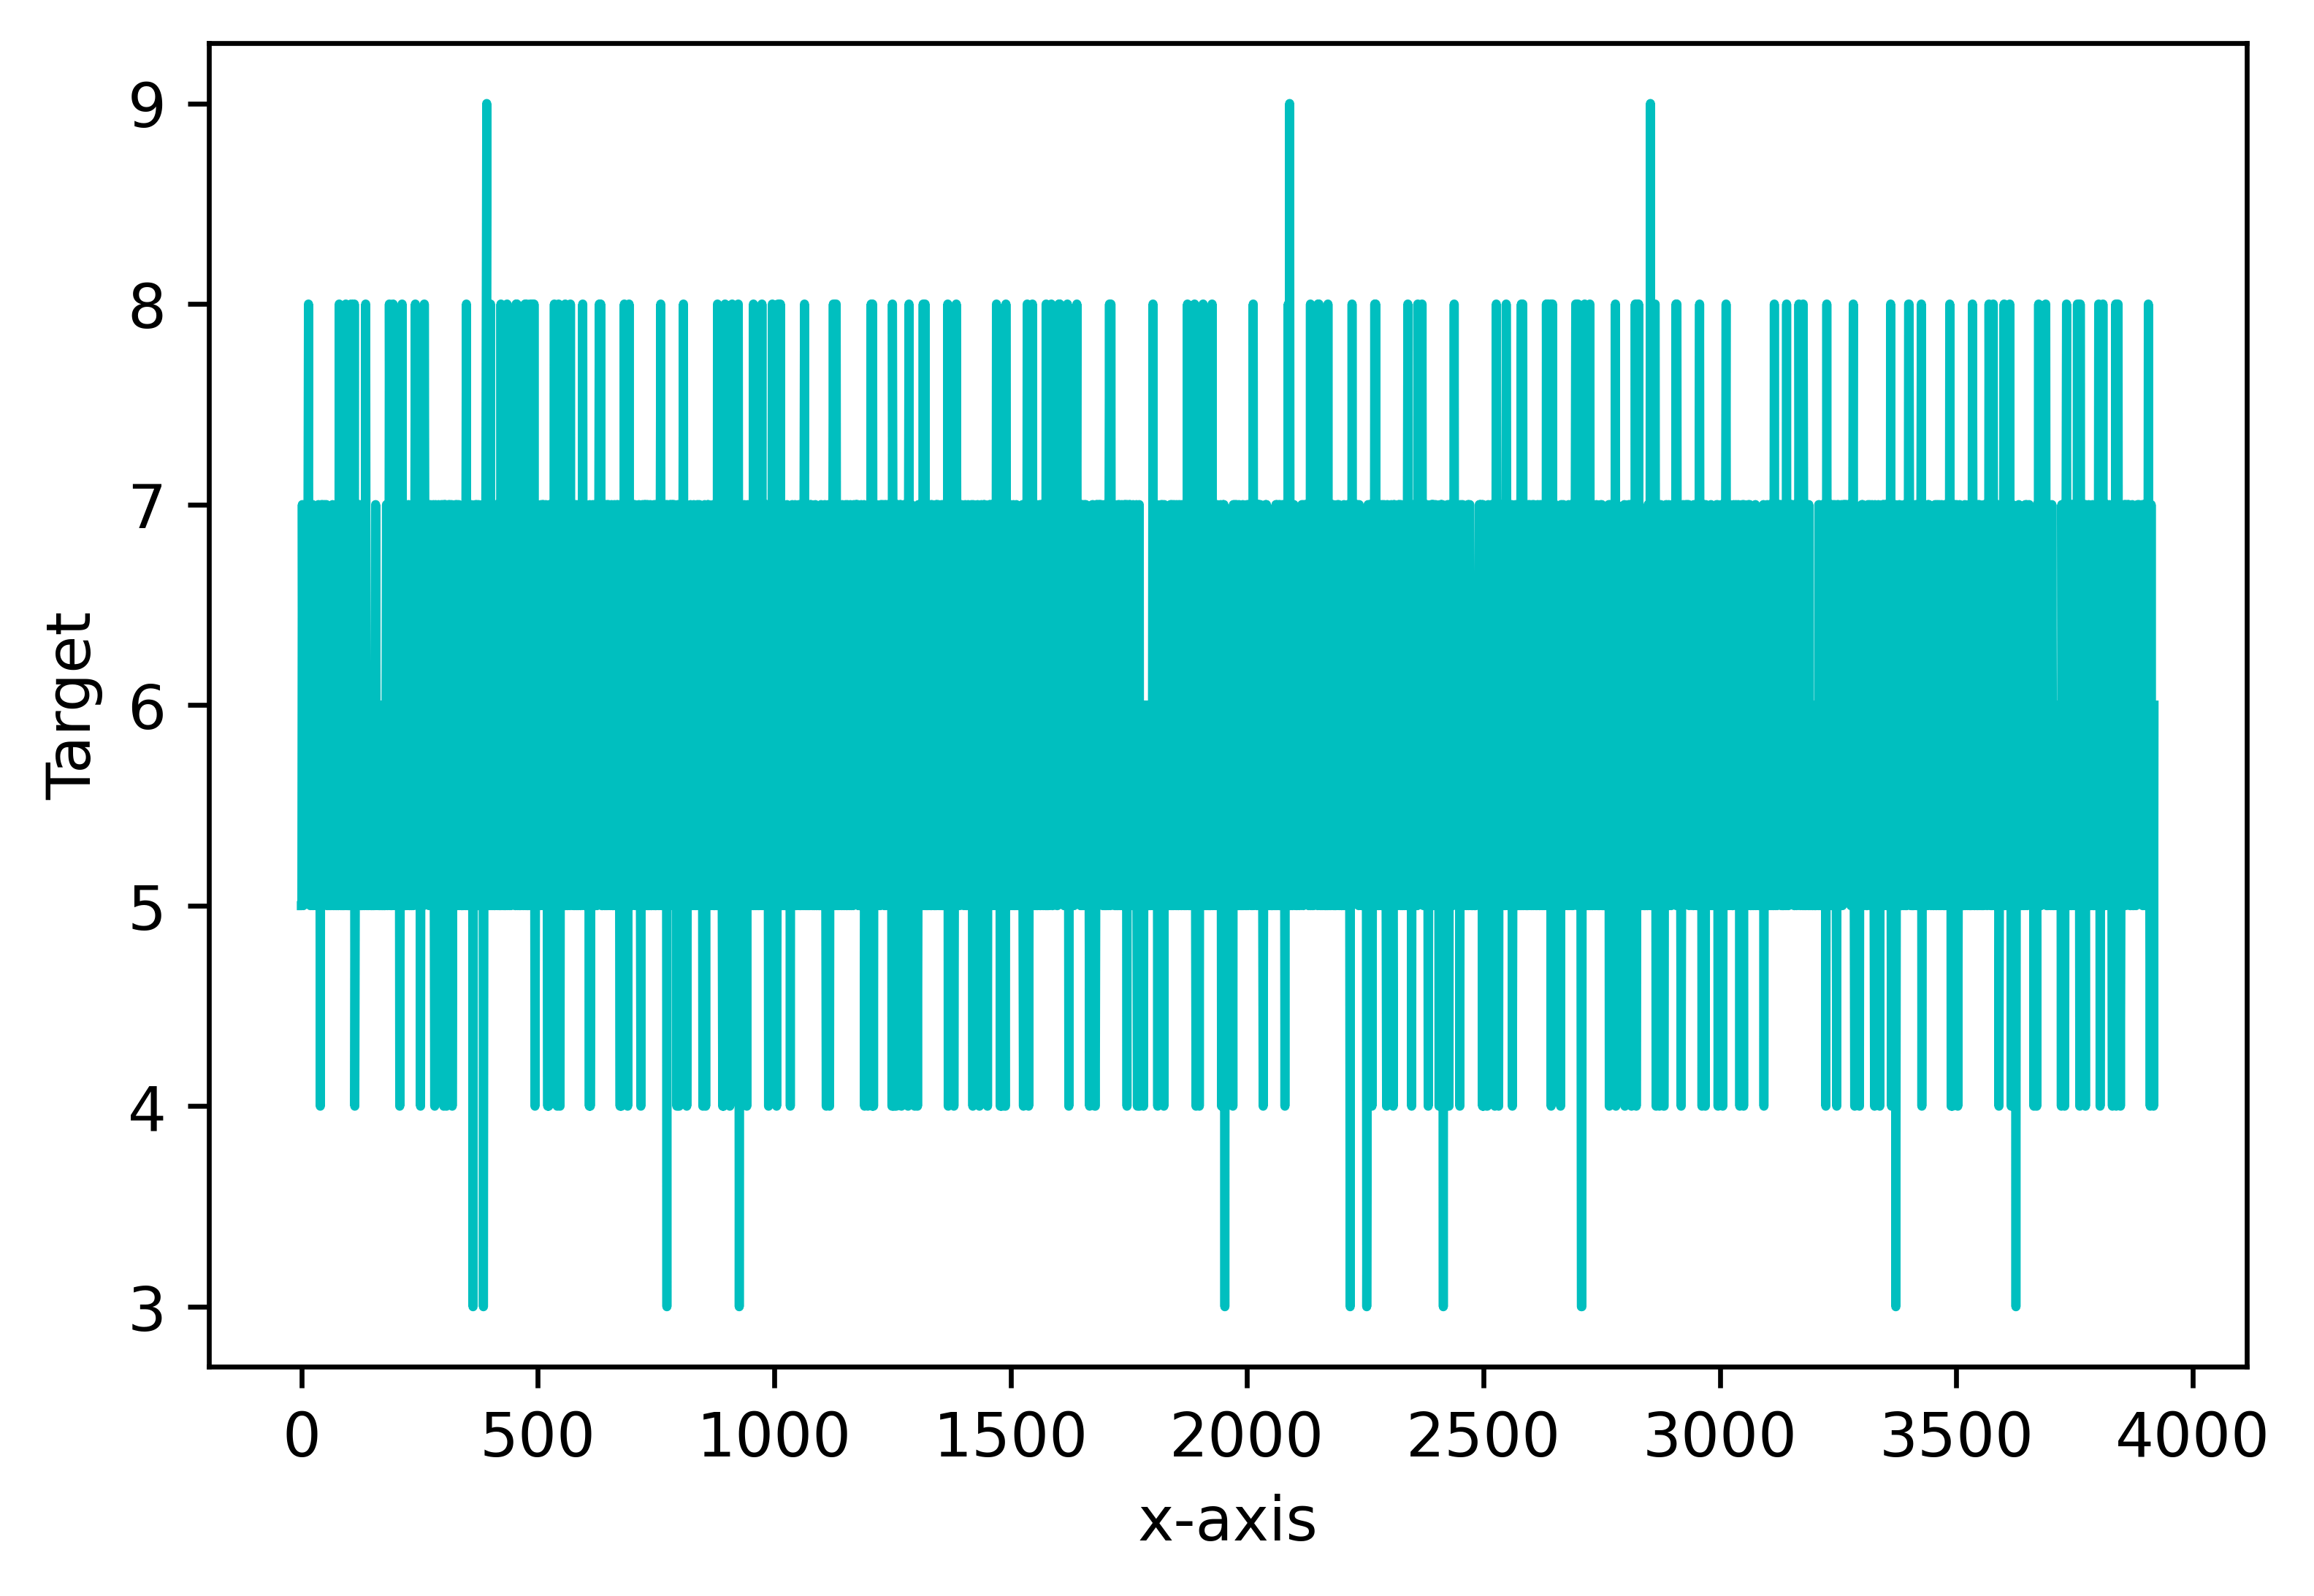

In [ ]:
from matplotlib import pyplot as plt
t_range = torch.arange(0., num_out).unsqueeze(1)
fig = plt.figure(dpi=600)

plt.xlabel("x-axis")
plt.ylabel("Target")
# plt.plot(t_u.numpy(), t_c.numpy(), 'o')
# plt.plot(t_range.numpy(), out_wine_data.detach().numpy(), 'c-')
plt.plot(t_range.numpy(), t_c_train.numpy(), 'c-')
# plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')

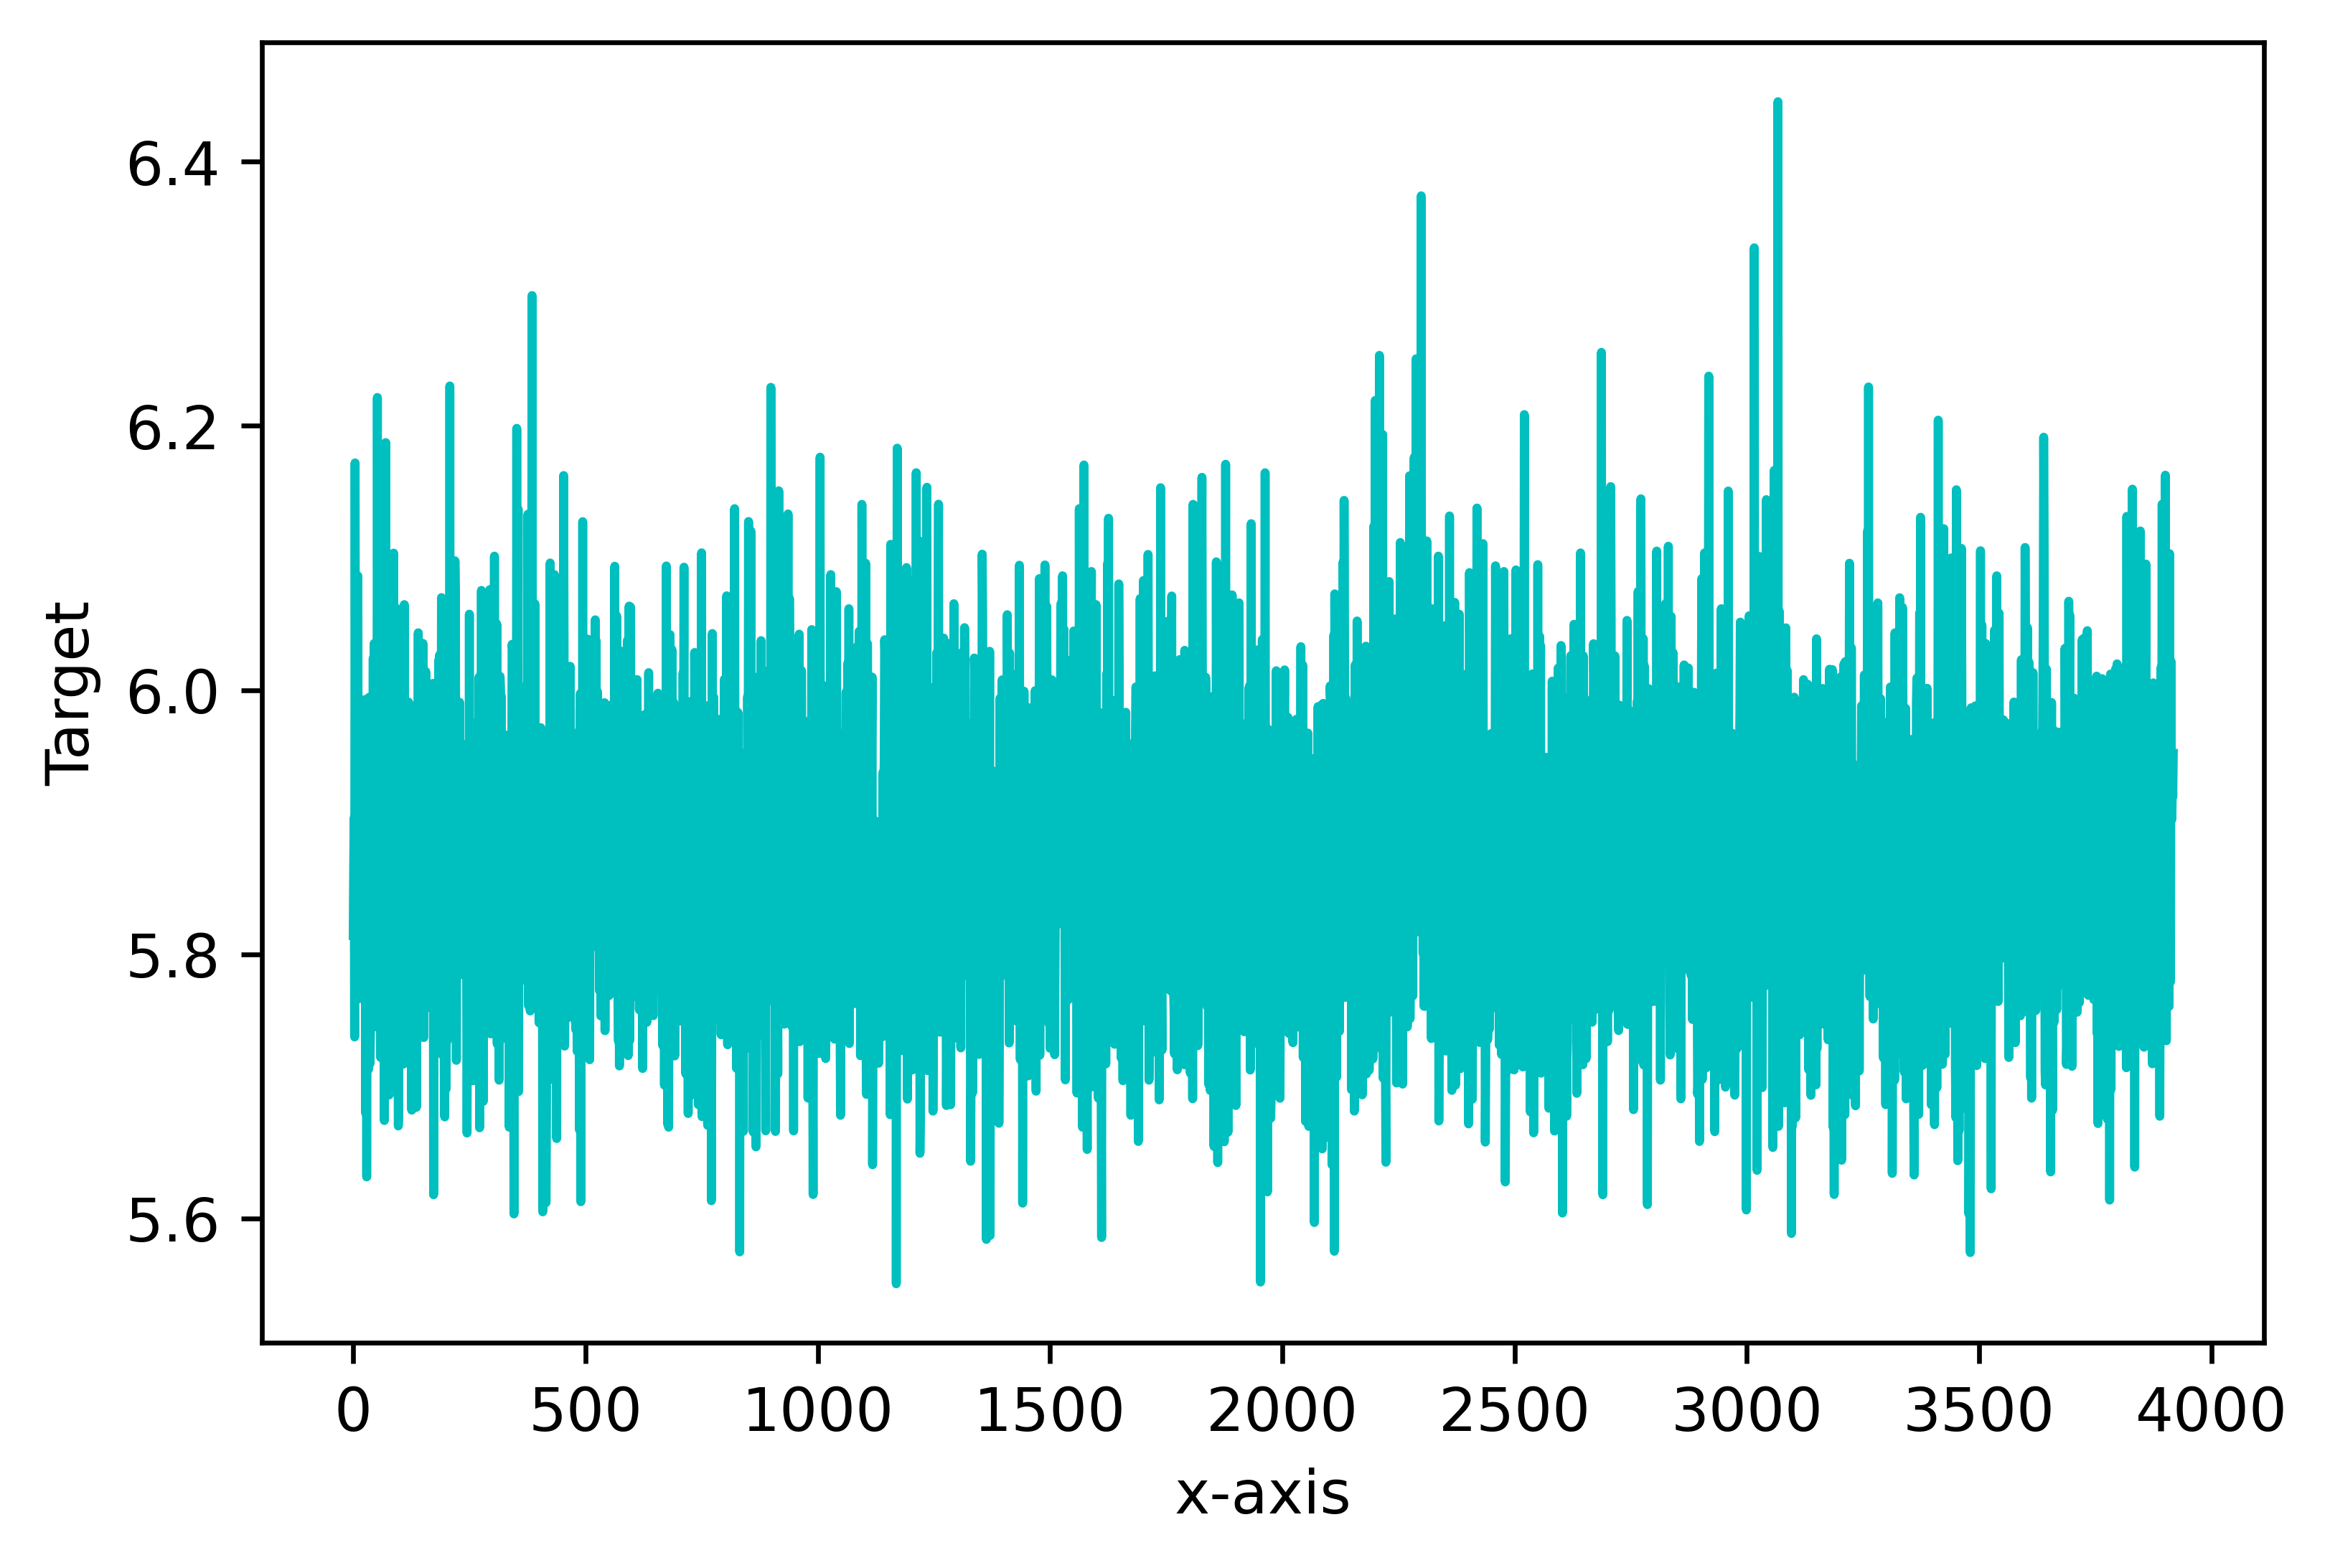

In [ ]:
from matplotlib import pyplot as plt
t_range = torch.arange(0., num_out).unsqueeze(1)
fig = plt.figure(dpi=600)

plt.xlabel("x-axis")
plt.ylabel("Target")
# plt.plot(t_u.numpy(), t_c.numpy(), 'o')
# plt.plot(t_range.numpy(), out_wine_data.detach().numpy(), 'c-')
plt.plot(t_range.numpy(), out_wine_data.detach().numpy(), 'c-')
# plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')